<a href="https://colab.research.google.com/github/IshaBhimani18/Python-Projects/blob/main/Google_Play_Store_App_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#1.Load the data file using pandas. 

In [ ]:
data = pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
data.shape

(10841, 13)

#2.Check for null values in the data. Get the number of null values for each column.

In [ ]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#3.Drop records with nulls in any of the columns. 

In [ ]:
data1 = data.dropna()  
data1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#4.Variables seem to have incorrect type and inconsistent formatting.Fixing them: 

In [ ]:
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
data1 = data1.reset_index()
data1

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9356,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9357,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9358,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 4.1 Size column has sizes in Kb as well as Mb. Converting these to numeric.

### 4.1.1 Extracting the numeric value from the column

In [ ]:
data1 = data1[data1['Size'].str.contains('Varies with device') == False]
data1

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9354,10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
9355,10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9356,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9357,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [ ]:
dataM = data1[data1['Size'].str.contains("M")]
dataM

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
9355,10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9356,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9357,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [ ]:
dataM['Size'] = dataM['Size'].str.extract('(\d+)')
dataM

<ipython-input-126-e6513cf00aa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataM['Size'] = dataM['Size'].str.extract('(\d+)')


,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
9355,10834,FR Calculator,FAMILY,4.0,7,2,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9356,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9357,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


###4.1.2 Multiplying the value by 1,000, for size mentioned in Mb

In [ ]:
dataM['Size'] = dataM['Size'].astype(int)
dataM['Size'] = 1000*dataM['Size'] 
dataM

<ipython-input-127-cbb38b52e18b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataM['Size'] = dataM['Size'].astype(int)
<ipython-input-127-cbb38b52e18b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataM['Size'] = 1000*dataM['Size']


,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2000,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
9355,10834,FR Calculator,FAMILY,4.0,7,2000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9356,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9357,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [ ]:
dataM.dtypes

index               int64
App                object
Category           object
Rating            float64
Reviews            object
Size                int64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
dataK = data1[data1['Size'].str.contains('k')]
dataK['Size'] = dataK['Size'].str.extract('(\d+)')
dataK['Size'] = dataK['Size'].astype(int)
dataK

<ipython-input-129-db0070b5ad10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataK['Size'] = dataK['Size'].str.extract('(\d+)')
<ipython-input-129-db0070b5ad10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataK['Size'] = dataK['Size'].astype(int)


,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
56,58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
198,209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
371,384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,79,"10,000,000+",Free,0,Everyone,Communication,"September 2, 2015",0.1.100944346,4.0.3 and up
437,450,Caller ID +,COMMUNICATION,4.0,9498,118,"1,000,000+",Free,0,Everyone,Communication,"June 7, 2016",5.28.0,2.3 and up
445,458,GO Notifier,COMMUNICATION,4.2,124346,695,"10,000,000+",Free,0,Everyone,Communication,"July 6, 2014",2.8,2.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9286,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
9301,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
9306,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
9353,10832,FR Tides,WEATHER,3.8,1195,582,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


In [ ]:
newdata = pd.concat([dataM,dataK])
newdata = newdata.reset_index()
newdata

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,9286,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,9301,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,9306,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,9353,10832,FR Tides,WEATHER,3.8,1195,582,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


##4.2.Reviews is a numeric field that is loaded as a string field. Converting it to numeric (int/float).

In [ ]:
newdata = newdata[newdata['Reviews'].str.contains('3.0M') == False]
newdata

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,9286,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,9301,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,9306,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,9353,10832,FR Tides,WEATHER,3.8,1195,582,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


In [ ]:
newdata['Reviews'] = newdata['Reviews'].astype(int)
newdata

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,9286,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,9301,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,9306,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,9353,10832,FR Tides,WEATHER,3.8,1195,582,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


##4.3.1 Installs field is currently stored as string and has values like 1,000,000+. Correcting them.

In [ ]:
newdata['Installs'] = newdata['Installs'].map(lambda x:str(x).replace('+',''))
newdata['Installs'] = newdata['Installs'].map(lambda x:str(x).replace(',',''))
newdata


,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,9286,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,9301,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,9306,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,9353,10832,FR Tides,WEATHER,3.8,1195,582,100000,Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


###4.3.2 Converting it to integer

In [ ]:
newdata['Installs'] = newdata['Installs'].astype(int)

In [ ]:
newdata.dtypes

level_0             int64
index               int64
App                object
Category           object
Rating            float64
Reviews             int64
Size                int64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

##4.4 Price field is a string and has dollar symbol. Removing dollar sign, and converting it to numeric.

In [ ]:
newdata['Price'] = newdata['Price'].map(lambda x:str(x).replace('$',''))
newdata['Price'] = newdata['Price'].astype(float)
newdata


,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,9286,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0.0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,9301,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0.0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,9306,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0.0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,9353,10832,FR Tides,WEATHER,3.8,1195,582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


# 5. Sanity checks:

##5.1 Average rating should be between 1 and 5. Dropping the rows that have a value outside this range.

In [ ]:
newdata = newdata[(newdata['Rating'] >= 1) & (newdata['Rating'] <= 5)]
newdata

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,9286,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0.0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,9301,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0.0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,9306,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0.0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,9353,10832,FR Tides,WEATHER,3.8,1195,582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


##5.2 Reviews should not be more than installs. Dropping any such records.

In [ ]:
newdata = newdata[(newdata['Installs']) > (newdata['Rating'])]

#dropping extra indices columns
newdata = newdata.drop(['level_0','index'], axis = 1)
newdata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0.0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0.0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0.0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,FR Tides,WEATHER,3.8,1195,582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


##5.3 For free apps (type = “Free”), the price should not be >0. Dropping any such rows.

In [ ]:
newdata1 = newdata.query('Type == "Free" and Price == 0')
newdata2 = newdata.query('Type == "Paid" and Price > 0')
newdata = pd.concat([newdata1, newdata2])
newdata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7704,Smart Wi-Fi Hotspot PRO,COMMUNICATION,3.7,197,957,10000,Paid,2.99,Everyone,Communication,"February 10, 2016",1.0,2.2 and up
7705,Portable Wi-Fi hotspot Premium,COMMUNICATION,3.7,481,420,10000,Paid,0.99,Everyone,Communication,"December 16, 2015",1.4.0.2,2.3 and up
7707,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,142,26,5000,Paid,1.00,Everyone,Tools,"June 26, 2011",1.0.0,2.1 and up
7713,Circle Colors Pack-FN Theme,PERSONALIZATION,4.2,6,89,50,Paid,0.99,Everyone,Personalization,"August 9, 2013",1.0,2.2 and up


In [ ]:
#Resetting index after dropping rows
new_data = newdata.reset_index(drop = True)
new_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7707,Smart Wi-Fi Hotspot PRO,COMMUNICATION,3.7,197,957,10000,Paid,2.99,Everyone,Communication,"February 10, 2016",1.0,2.2 and up
7708,Portable Wi-Fi hotspot Premium,COMMUNICATION,3.7,481,420,10000,Paid,0.99,Everyone,Communication,"December 16, 2015",1.4.0.2,2.3 and up
7709,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,142,26,5000,Paid,1.00,Everyone,Tools,"June 26, 2011",1.0.0,2.1 and up
7710,Circle Colors Pack-FN Theme,PERSONALIZATION,4.2,6,89,50,Paid,0.99,Everyone,Personalization,"August 9, 2013",1.0,2.2 and up


#5.4 5. Performing univariate analysis: 

##Boxplot for Price

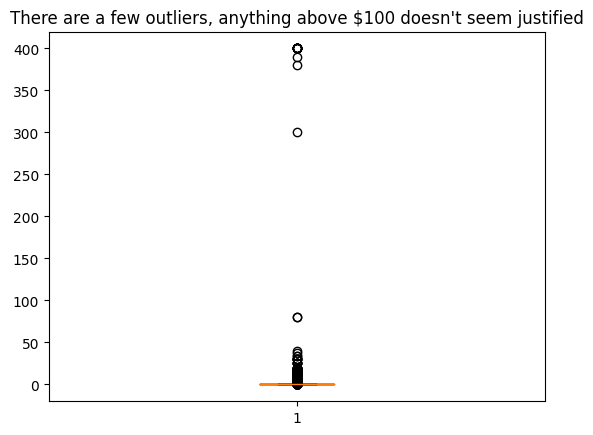

In [ ]:
plt.boxplot(new_data["Price"])
plt.title("There are a few outliers, anything above $100 doesn't seem justified")
plt.show()

##Boxplot for Reviews

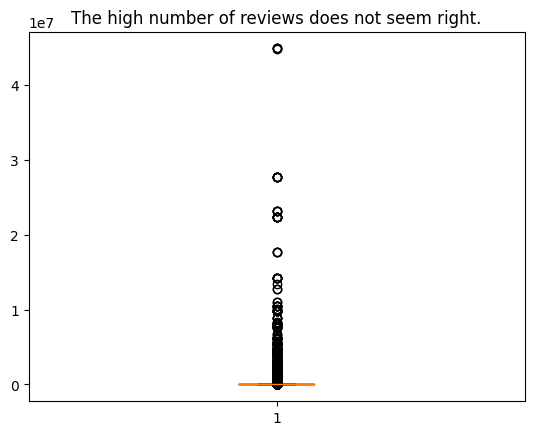

In [ ]:
plt.boxplot(new_data["Reviews"])
plt.title('The high number of reviews does not seem right.')
plt.show()

##Histogram for Reviews


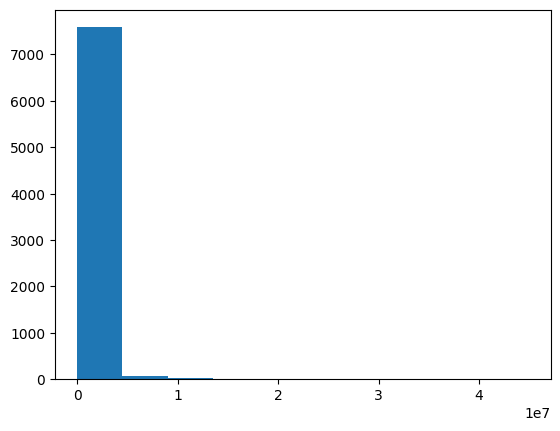

In [ ]:
plt.hist(new_data["Reviews"])
plt.show()

##Histogram for Rating

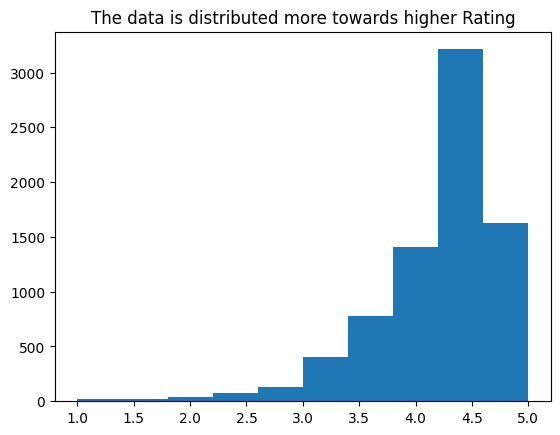

In [ ]:
plt.hist(new_data['Rating'])
plt.title("The data is distributed more towards higher Rating")
plt.show()

##Histogram for Size

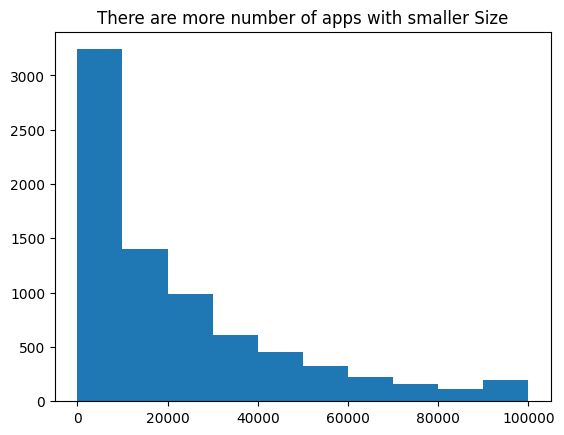

In [ ]:
plt.hist(new_data['Size'])
plt.title('There are more number of apps with smaller Size')
plt.show()

#6 Outlier treatment 

##6.1 Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
##Dropping these as most seem to be junk apps

In [ ]:
new_data = new_data[(new_data['Price'] < 200)]
new_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7707,Smart Wi-Fi Hotspot PRO,COMMUNICATION,3.7,197,957,10000,Paid,2.99,Everyone,Communication,"February 10, 2016",1.0,2.2 and up
7708,Portable Wi-Fi hotspot Premium,COMMUNICATION,3.7,481,420,10000,Paid,0.99,Everyone,Communication,"December 16, 2015",1.4.0.2,2.3 and up
7709,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,142,26,5000,Paid,1.00,Everyone,Tools,"June 26, 2011",1.0.0,2.1 and up
7710,Circle Colors Pack-FN Theme,PERSONALIZATION,4.2,6,89,50,Paid,0.99,Everyone,Personalization,"August 9, 2013",1.0,2.2 and up


##6.2 Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Dropping records having more than 2 million reviews.

In [ ]:
new_data = new_data[(new_data['Reviews'] < 2000000)]
new_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7707,Smart Wi-Fi Hotspot PRO,COMMUNICATION,3.7,197,957,10000,Paid,2.99,Everyone,Communication,"February 10, 2016",1.0,2.2 and up
7708,Portable Wi-Fi hotspot Premium,COMMUNICATION,3.7,481,420,10000,Paid,0.99,Everyone,Communication,"December 16, 2015",1.4.0.2,2.3 and up
7709,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,142,26,5000,Paid,1.00,Everyone,Tools,"June 26, 2011",1.0.0,2.1 and up
7710,Circle Colors Pack-FN Theme,PERSONALIZATION,4.2,6,89,50,Paid,0.99,Everyone,Personalization,"August 9, 2013",1.0,2.2 and up


## 6.3 Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
###Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [ ]:
quartile_10 = np.percentile(new_data['Installs'],10)
quartile_25 = np.percentile(new_data['Installs'],25)
quartile_50 = np.percentile(new_data['Installs'],50)
quartile_70 = np.percentile(new_data['Installs'],70)
quartile_90 = np.percentile(new_data['Installs'],90)
quartile_95 = np.percentile(new_data['Installs'],95)
quartile_99 = np.percentile(new_data['Installs'],99)

In [ ]:
print(quartile_10, quartile_25, quartile_50, quartile_70, quartile_90, quartile_95, quartile_99)

1000.0 10000.0 100000.0 1000000.0 10000000.0 10000000.0 50000000.0


###Dropping less than 10 and more than 70 percentile

In [ ]:
new_data_out = new_data[(newdata['Installs'] > quartile_10) & (new_data['Installs'] < quartile_70)]
new_data_out

<ipython-input-150-4efb2ca20633>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data_out = new_data[(newdata['Installs'] > quartile_10) & (new_data['Installs'] < quartile_70)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5000,50000,Free,0.00,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000,50000,Free,0.00,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7707,Smart Wi-Fi Hotspot PRO,COMMUNICATION,3.7,197,957,10000,Paid,2.99,Everyone,Communication,"February 10, 2016",1.0,2.2 and up
7708,Portable Wi-Fi hotspot Premium,COMMUNICATION,3.7,481,420,10000,Paid,0.99,Everyone,Communication,"December 16, 2015",1.4.0.2,2.3 and up
7709,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,142,26,5000,Paid,1.00,Everyone,Tools,"June 26, 2011",1.0.0,2.1 and up
7710,Circle Colors Pack-FN Theme,PERSONALIZATION,4.2,6,89,50,Paid,0.99,Everyone,Personalization,"August 9, 2013",1.0,2.2 and up


#7. Bivariate analysis:

##7.1. Scatter plot/joinplot for Rating vs. Price

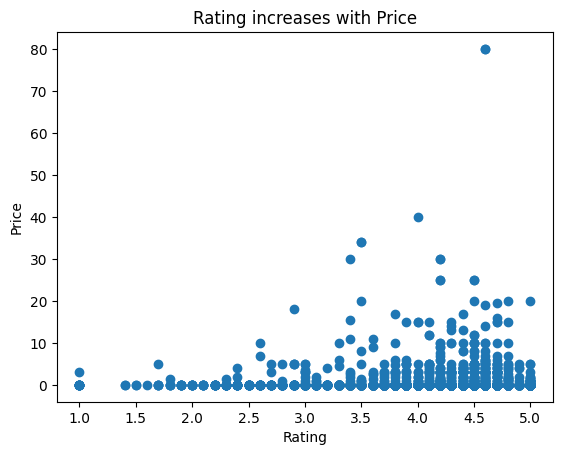

In [ ]:
plt.scatter(new_data_out['Rating'], new_data_out['Price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title("Rating increases with Price")
plt.show()

##7.2. Scatter plot/joinplot for Rating vs. Size

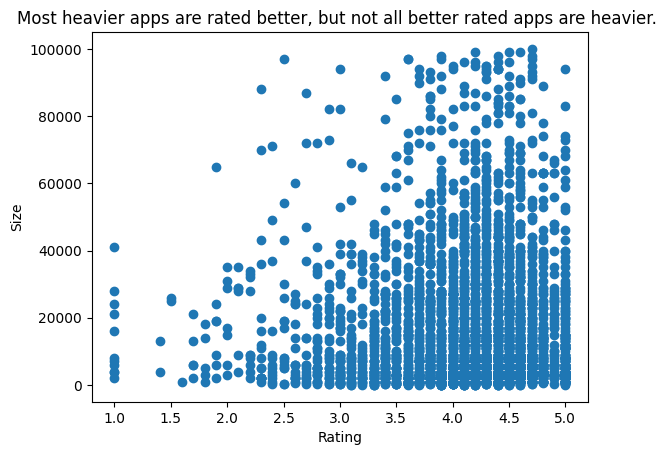

In [ ]:
plt.scatter(new_data_out['Rating'], new_data_out['Size'])
plt.xlabel('Rating')
plt.ylabel('Size')
plt.title("Most heavier apps are rated better, but not all better rated apps are heavier. ")
plt.show()

##7.3. Scatter plot/joinplot for Rating vs. Reviews

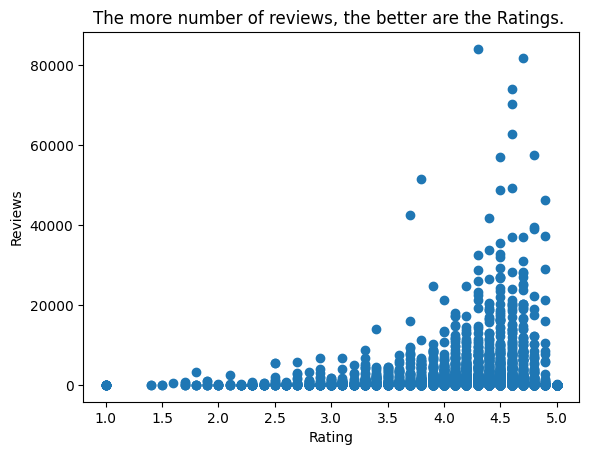

In [ ]:
plt.scatter(new_data_out['Rating'], new_data_out['Reviews'])
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title("The more number of reviews, the better are the Ratings. ")
plt.show()

##7.4. Boxplot for Rating vs. Content Rating

Mature and Teen Cateories are liked better after 'Everyone' cateory. 


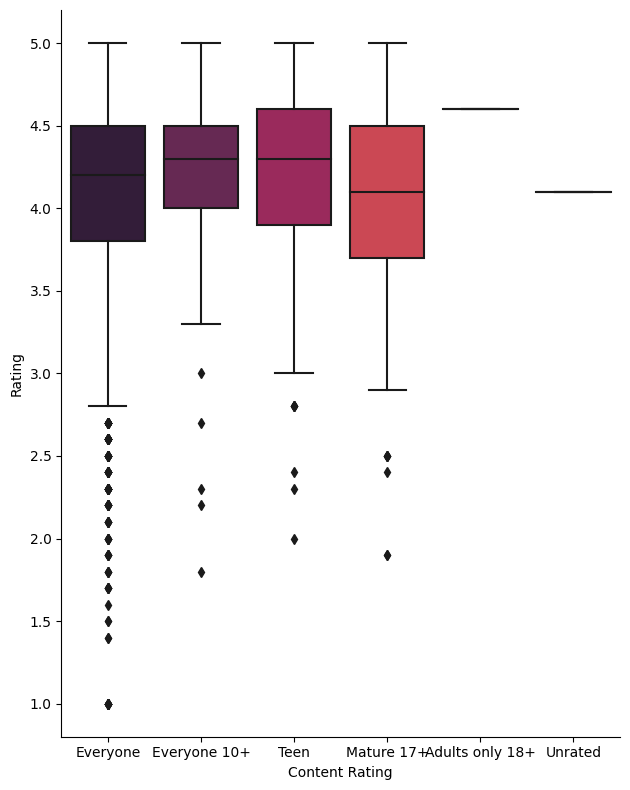

In [ ]:
sns.catplot(data = new_data_out, x = 'Content Rating', y = 'Rating', kind = 'box', palette = 'rocket', height = 8, aspect = 0.8)
print("Mature and Teen Cateories are liked better after 'Everyone' cateory. ")

##7.5. Boxplot for Ratings vs. Category

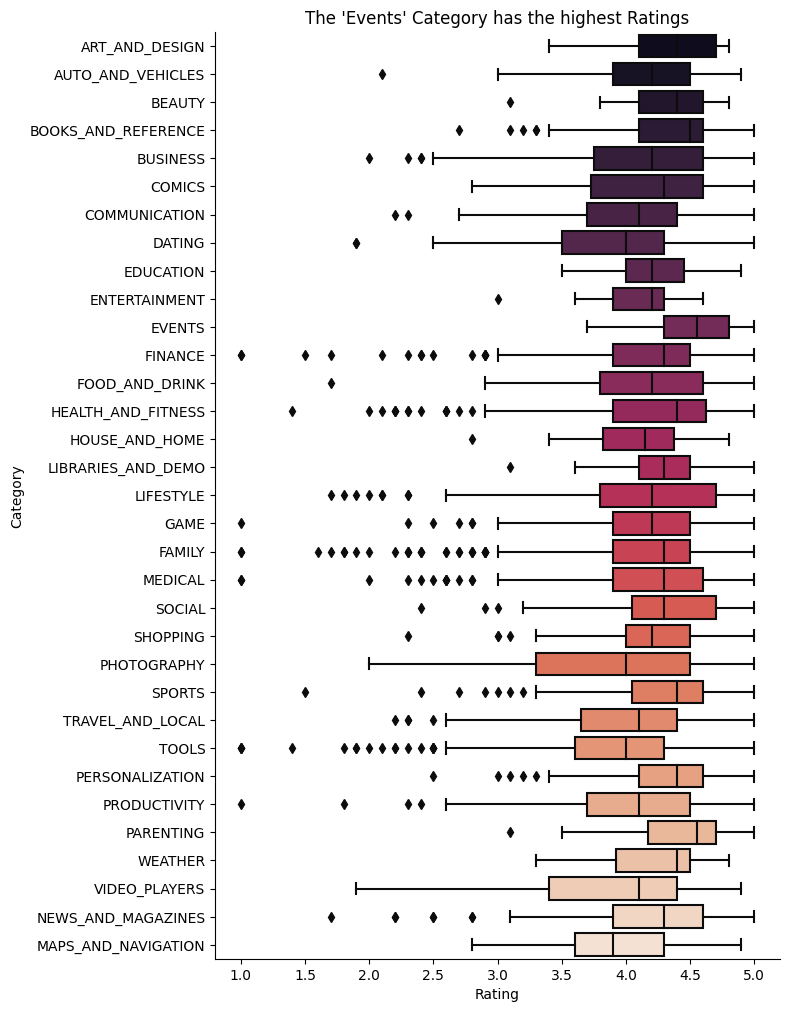

In [ ]:
sns.catplot(data = new_data_out, x = 'Rating', y = 'Category', kind = 'box', palette = 'rocket', height = 10, aspect = 0.8)
plt.title("The 'Events' Category has the highest Ratings")
plt.show()

#8. Data preprocessing


##8.1. Reviews and Installs have some values that are still relatively very high.Apply log transformation (np.log1p) to Reviews and Installs.

In [ ]:
#Transforming with Log
to_log = ['Reviews', 'Installs']
df_log = new_data_out[to_log].applymap(lambda x:np.log(x + 1))
df_log

,Reviews,Installs
0,5.075174,9.210440
1,6.875232,13.122365
4,6.875232,11.512935
5,5.123964,10.819798
6,5.187386,10.819798
...,...,...
7707,5.288267,9.210440
7708,6.177944,9.210440
7709,4.962845,8.517393
7710,1.945910,3.931826


In [ ]:
new_data_out['Reviews'] = df_log['Reviews']
new_data_out['Installs'] = df_log['Installs']

<ipython-input-157-09fbef470bf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_out['Reviews'] = df_log['Reviews']
<ipython-input-157-09fbef470bf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_out['Installs'] = df_log['Installs']


In [ ]:
new_data_out

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000,9.210440,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000,13.122365,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2000,11.512935,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5000,10.819798,Free,0.00,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,5.187386,19000,10.819798,Free,0.00,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7707,Smart Wi-Fi Hotspot PRO,COMMUNICATION,3.7,5.288267,957,9.210440,Paid,2.99,Everyone,Communication,"February 10, 2016",1.0,2.2 and up
7708,Portable Wi-Fi hotspot Premium,COMMUNICATION,3.7,6.177944,420,9.210440,Paid,0.99,Everyone,Communication,"December 16, 2015",1.4.0.2,2.3 and up
7709,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,4.962845,26,8.517393,Paid,1.00,Everyone,Tools,"June 26, 2011",1.0.0,2.1 and up
7710,Circle Colors Pack-FN Theme,PERSONALIZATION,4.2,1.945910,89,3.931826,Paid,0.99,Everyone,Personalization,"August 9, 2013",1.0,2.2 and up


##8.2. Dropping columns App, Last Updated, Current Ver, and Android Ver

In [ ]:
#Also dropped "Type" Column, as it is already reflected in Price

new_data = new_data_out.drop(['App','Type','Last Updated','Current Ver','Android Ver'],axis = 1)

In [ ]:
new_data

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000,9.210440,0.00,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000,13.122365,0.00,Everyone,Art & Design;Pretend Play
4,ART_AND_DESIGN,4.3,6.875232,2000,11.512935,0.00,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5000,10.819798,0.00,Everyone,Art & Design
6,ART_AND_DESIGN,3.8,5.187386,19000,10.819798,0.00,Everyone,Art & Design
...,...,...,...,...,...,...,...,...
7707,COMMUNICATION,3.7,5.288267,957,9.210440,2.99,Everyone,Communication
7708,COMMUNICATION,3.7,6.177944,420,9.210440,0.99,Everyone,Communication
7709,TOOLS,4.5,4.962845,26,8.517393,1.00,Everyone,Tools
7710,PERSONALIZATION,4.2,1.945910,89,3.931826,0.99,Everyone,Personalization


##8.3. Get dummy columns for Category, Genres, and Content Rating.

In [ ]:
inp2 = pd.get_dummies(new_data, columns = ['Category', 'Genres', 'Content Rating'])

In [ ]:
inp2

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000,9.210440,0.00,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000,13.122365,0.00,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2000,11.512935,0.00,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5000,10.819798,0.00,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,3.8,5.187386,19000,10.819798,0.00,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7707,3.7,5.288267,957,9.210440,2.99,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7708,3.7,6.177944,420,9.210440,0.99,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7709,4.5,4.962845,26,8.517393,1.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7710,4.2,1.945910,89,3.931826,0.99,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#9. Train test split, applying 70-30 split.

In [ ]:
#Defining x & y

X = inp2.drop(['Rating'], axis = 1).values
y = inp2['Rating'].values

#10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [ ]:
df_train = X_train,y_train
df_test = X_test, y_test

#11. Model Selection

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
y_pred_train = regressor.predict(X_train)
r2_score(y_train,y_pred_train)

0.1496914230594062

##12. Make predictions on test set and report R2.

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

[4.02947767 4.30023553 4.55360107 ... 4.42308414 4.22825698 4.0393862 ]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.12499974494492894

In [ ]:
print("The accuracy of the Model is pretty low to be reliable.")

The accuracy of the Model is pretty low to be reliable.
